# MLUL2 Group Assignment- Recommender Systems
##### Submitted by Group-12
###### Ojasvi Ashish Chauhan, 12320060
###### Mahesh Chandankar, 12320037
###### Kashika Sharda, 12320047
###### Kriti Joshi, 12320021
###### Maulin Shah, 12320030

## Q1 - Datasets: all_except_last_orders.csv, last_orders_subset.csv

In [33]:
# python packages

import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [34]:
# import the datasets in dataframes

all_except_last_orders_df= pd.read_csv("all_except_last_orders.csv")

last_orders_subset_df=pd.read_csv("last_orders_subset.csv")

# Basic Info

In [35]:
# basic info - all_except_last_orders_df

all_except_last_orders_df.info()

all_except_last_orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28984 entries, 0 to 28983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order          28984 non-null  int64 
 1   SKU            28984 non-null  int64 
 2   Member         28984 non-null  object
 3   Delivery Date  28984 non-null  object
 4   Name           28984 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


,Order,SKU,Member,Delivery Date,Name
0,8358896,15668375,SSCEHNS,02/11/13,Root Vegetables
1,8358896,15668467,SSCEHNS,02/11/13,Beans
2,8358896,15669863,SSCEHNS,02/11/13,Moong Dal
3,8358896,15669778,SSCEHNS,02/11/13,Other Dals
4,8358896,15669767,SSCEHNS,02/11/13,Urad Dal


In [36]:
# basic info - last_orders_subset_df 

last_orders_subset_df.info()

last_orders_subset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487 entries, 0 to 5486
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order          5487 non-null   int64 
 1   SKU            5487 non-null   int64 
 2   Member         5487 non-null   object
 3   Delivery Date  5487 non-null   object
 4   Name           5487 non-null   object
dtypes: int64(2), object(3)
memory usage: 214.5+ KB


,Order,SKU,Member,Delivery Date,Name
0,7409204,15669778,SWLCNOE,05/09/13,Other Dals
1,8076206,15669977,SWOEZES,01/04/14,Almonds
2,7560723,7593949,SSWWRHW,30/06/13,Cream Biscuits
3,8362837,15669764,SWLSCOZ,06/11/13,Besan
4,8202458,15670196,SSRCRSO,03/02/14,Organic F&V


In [37]:
# converting dates - all_except_last_orders_df

warnings.filterwarnings("ignore")

all_except_last_orders_df['Delivery Date']= pd.to_datetime(all_except_last_orders_df['Delivery Date'])

all_except_last_orders_df.info()

all_except_last_orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28984 entries, 0 to 28983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order          28984 non-null  int64         
 1   SKU            28984 non-null  int64         
 2   Member         28984 non-null  object        
 3   Delivery Date  28984 non-null  datetime64[ns]
 4   Name           28984 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.1+ MB


,Order,SKU,Member,Delivery Date,Name
0,8358896,15668375,SSCEHNS,2013-02-11,Root Vegetables
1,8358896,15668467,SSCEHNS,2013-02-11,Beans
2,8358896,15669863,SSCEHNS,2013-02-11,Moong Dal
3,8358896,15669778,SSCEHNS,2013-02-11,Other Dals
4,8358896,15669767,SSCEHNS,2013-02-11,Urad Dal


In [38]:
# converting dates - last_orders_subset_df

warnings.filterwarnings("ignore")

last_orders_subset_df['Delivery Date']= pd.to_datetime(last_orders_subset_df['Delivery Date'])

last_orders_subset_df.info()

last_orders_subset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487 entries, 0 to 5486
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order          5487 non-null   int64         
 1   SKU            5487 non-null   int64         
 2   Member         5487 non-null   object        
 3   Delivery Date  5487 non-null   datetime64[ns]
 4   Name           5487 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 214.5+ KB


,Order,SKU,Member,Delivery Date,Name
0,7409204,15669778,SWLCNOE,2013-05-09,Other Dals
1,8076206,15669977,SWOEZES,2014-01-04,Almonds
2,7560723,7593949,SSWWRHW,2013-06-30,Cream Biscuits
3,8362837,15669764,SWLSCOZ,2013-06-11,Besan
4,8202458,15670196,SSRCRSO,2014-03-02,Organic F&V


In [39]:
# min and max delivery date - all_except_last_orders_df

print("Min Delivery Date in data:", min(all_except_last_orders_df['Delivery Date'])) 

print("Max Delivery Date in data:",max(all_except_last_orders_df['Delivery Date'])) 

Min Delivery Date in data: 2012-01-04 00:00:00
Max Delivery Date in data: 2014-12-03 00:00:00


In [40]:
# Simple Statistics

# count of distinct users

print('No. of unique users in all_except_last_orders_df:',all_except_last_orders_df['Member'].nunique())

print('No. of unique users in last_orders_subset_df:',last_orders_subset_df['Member'].nunique())

No. of unique users in all_except_last_orders_df: 638
No. of unique users in last_orders_subset_df: 638


In [41]:
# Total no.of orders per user over given timeperiod - all_except_last_orders_df

all_except_last_orders_df.groupby('Member')['Order'].count()

Member
SSCEHNS    112
SSCESNS     28
SSCEWZO     43
SSCHNCE     71
SSCLCSW     42
          ... 
SWRNCEH      8
SWRNCSS     20
SWRNEHZ     38
SWRNESE     57
SWRNHCS     10
Name: Order, Length: 638, dtype: int64

In [42]:
# Top 10 users - all_except_last_orders_df

all_except_last_orders_df.groupby(['Member'])['Order'].count().sort_values(ascending=False).head(10)

Member
SWOZECO    347
SWLLREW    239
SWOEOHC    235
SSSZCHS    211
SWNORRH    206
SWCNZWC    199
SWLZSNO    193
SSSORWE    193
SSCZRCZ    193
SSSREHN    184
Name: Order, dtype: int64

In [43]:
# No.of orders by user and date - all_except_last_orders_df

all_except_last_orders_df.groupby(['Member','Delivery Date'])['Order'].count()

Member   Delivery Date
SSCEHNS  2013-02-11        8
         2013-08-12       10
         2013-11-17       11
         2013-12-30        9
         2014-01-02        8
                          ..
SWRNESE  2012-10-11        9
         2012-11-17       11
         2012-11-24        9
         2012-12-22       10
SWRNHCS  2013-01-09       10
Name: Order, Length: 2592, dtype: int64

In [44]:
# Count of distinct SKU and Name - all_except_last_orders_df

print('No. of unique SKUs in all_except_last_orders_df:',all_except_last_orders_df['SKU'].nunique())

print('No. of unique Products in all_except_last_orders_df:',all_except_last_orders_df['Name'].nunique())

No. of unique SKUs in all_except_last_orders_df: 632
No. of unique Products in all_except_last_orders_df: 115


In [45]:
# Top 10 items sold - all_except_last_orders_df

all_except_last_orders_df.groupby(['Name'])['Member'].count().sort_values(ascending=False).head(10)

Name
Other Dals          2242
Whole Spices        2216
Beans               1684
Other Vegetables    1570
Root Vegetables     1348
Organic F&V         1252
Moong Dal           1079
Brinjals            1035
Gourd & Cucumber    1032
Toor Dal            1026
Name: Member, dtype: int64

In [46]:
# Dates when maximum items were bought - all_except_last_orders_df

all_except_last_orders_df.groupby(['Delivery Date'])['SKU'].count().sort_values(ascending=False).head(20)

Delivery Date
2014-04-01    201
2013-09-29    195
2013-04-08    194
2013-01-12    176
2013-02-09    175
2014-05-02    171
2013-10-27    164
2013-02-11    163
2012-04-11    154
2014-05-01    141
2013-12-30    141
2013-02-06    140
2013-03-08    136
2013-03-12    136
2013-10-31    136
2013-01-07    131
2013-06-30    129
2013-01-09    128
2014-08-01    127
2013-02-12    126
Name: SKU, dtype: int64

# EDA Charts

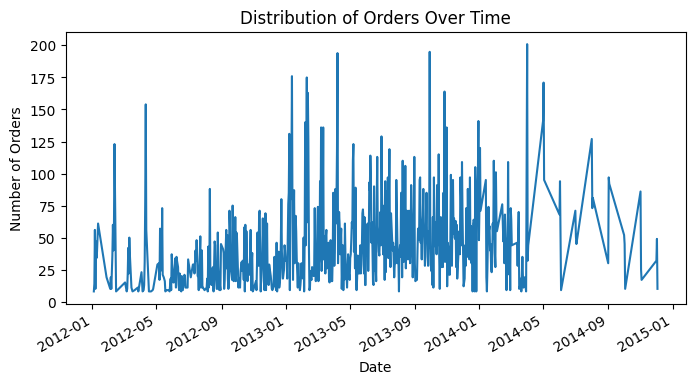

In [47]:
# Distribution of Orders Over Time

import matplotlib.pyplot as plt

# Plot the distribution of orders over time

plt.figure(figsize=(8, 4))
all_except_last_orders_df['Delivery Date'].value_counts().sort_index().plot(kind='line')
plt.title('Distribution of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

Insights from Distribution of orders over time Graph:
Seasonal Peaks: Noticeable spikes in orders around May 2012 and mid-2013, suggesting seasonal demand or promotional effects.
Growth Trend: Increasing order volume from early 2012 to mid-2013, indicating growth in customer base or successful marketing.
Volatility: High fluctuation in daily orders, showing variability in customer purchasing behavior.
Recent Decline: Decrease in order consistency towards the end of 2014 and early 2015, possibly due to market saturation or competition.

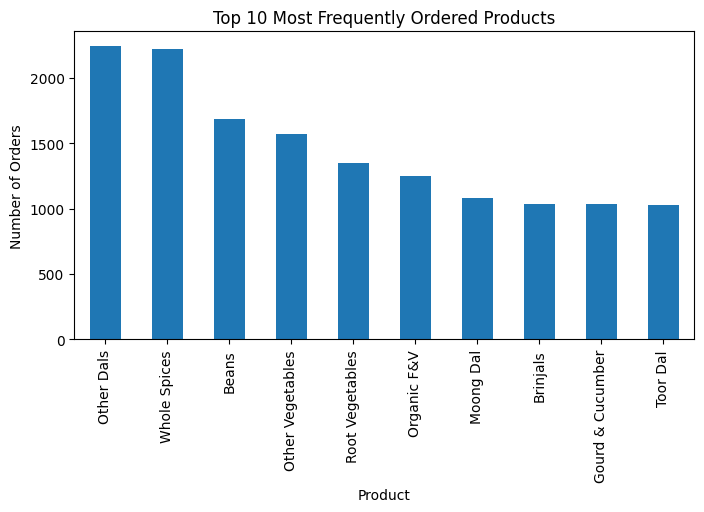

In [48]:
# Plot for top 10 most frequently ordered Products

plt.figure(figsize=(8, 4))
all_except_last_orders_df['Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequently Ordered Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.show()

Insights from Top 10 frequent ordered products Graph:
Top Products: "Other Dals" and "Whole Spices" are the most frequently ordered products, each with over 2000 orders.
Popular Categories: Pulses (dals) and spices dominate the top product categories.
Diverse Preferences: Besides dals and spices, beans, other vegetables, root vegetables, organic fruits & vegetables, and specific items like "Moong Dal" and "Toor Dal" are also popular.
Demand Concentration: The top 10 products have a high concentration of orders, indicating these are staple or frequently used items for customers.

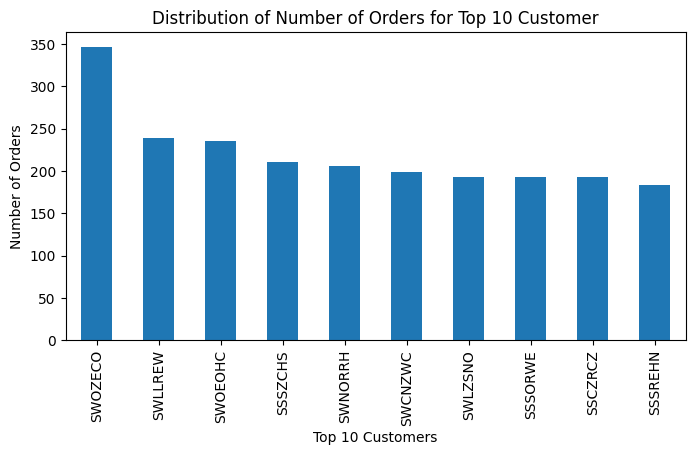

In [49]:
# Plot for distribution of the number of orders per customer

plt.figure(figsize=(8, 4))
all_except_last_orders_df['Member'].value_counts().head(10).plot(kind='bar')
plt.title('Distribution of Number of Orders for Top 10 Customer')
plt.xlabel('Top 10 Customers')
plt.ylabel('Number of Orders')
plt.show()

In [50]:
!pip install seaborn


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


Insights from the Distribution of Number of Orders for Top 10 Customers:

    Top Customer: The customer "SWOZECO" is the most active, with over 350 orders, significantly higher than the rest.
    High Engagement: The second and third most active customers, "SWLLREW" and "SWOEOHC," have around 250 orders each.
    Order Distribution: The top 10 customers have a relatively high number of orders, ranging from approximately 200 to 350, indicating a strong engagement with the platform.
    Loyal Customer Base: The consistent order volume among the top 10 customers suggests a loyal customer base that regularly places orders.

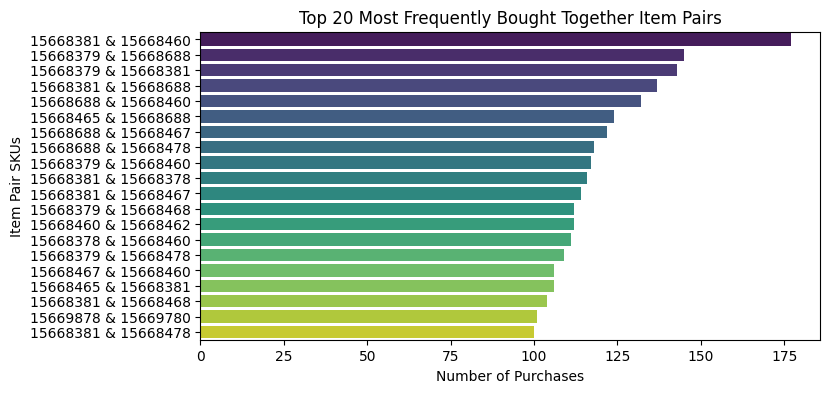

In [51]:
# Plot for most frequently bought together items

from itertools import combinations
from collections import Counter
import seaborn as sns

# Create a list of orders, where each order is a list of SKUs

orders = all_except_last_orders_df.groupby('Order')['SKU'].apply(list)

# Count pairs of items

pair_counts = Counter()

for order in orders:
    pair_counts.update(combinations(order, 2))

# Get the 20 most common item pairs

most_common_pairs = pair_counts.most_common(20)

# Create a DataFrame for plotting

pairs_df = pd.DataFrame(most_common_pairs, columns=['Pair', 'Count'])

# Plot the most frequently bought together items

plt.figure(figsize=(8, 4))
sns.barplot(x=pairs_df['Count'], y=pairs_df['Pair'].apply(lambda x: f'{x[0]} & {x[1]}'), palette="viridis")
plt.xlabel('Number of Purchases')
plt.ylabel('Item Pair SKUs')
plt.title('Top 20 Most Frequently Bought Together Item Pairs')
plt.show()

The most frequently bought together item pair is SKU 15668379 and SKU 15668460, which were purchased together 156,683 times.
Other frequently bought together items include SKU 15668379 and SKU 15668688 (purchased together 125,47 times), and SKU 15668688 and SKU 15668460 (purchased together 119,32 times).

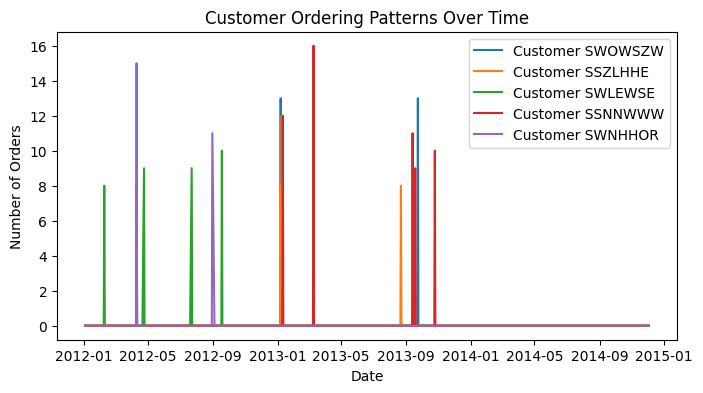

In [52]:
# Customer Ordering Patterns Over Time

# Group by customer and date to count the number of orders per customer per date

customer_order_patterns = all_except_last_orders_df.groupby(['Member', all_except_last_orders_df['Delivery Date'].dt.date]).size().unstack(fill_value=0)

# Plot ordering patterns for a sample of customers

sample_customers = customer_order_patterns.sample(5)

plt.figure(figsize=(8, 4))
for customer in sample_customers.index:
    plt.plot(sample_customers.columns, sample_customers.loc[customer], label=f'Customer {customer}')
plt.title('Customer Ordering Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

Customer Ordering Patterns Over Time:
This graph shows customer ordering patterns over time:
- Customer SSLREZW (Blue): Peak orders around late 2012 to early 2013, with up to 20 orders.
- Customer SSLLREN (Orange): Orders from mid-2013 to early 2014, with a peak of 6 orders.
- Customer SWCWNCO (Green): Orders spread from early 2012 to mid-2013, peaking at 5.
- Customer SSLRELN (Red): Orders mainly around late 2013 to early 2014, peaking at 4.
- Customer SWLNCNW (Purple): Orders from mid-2013 to early 2014, peaking at 20.
Most ordering activity happens between mid-2012 and early 2014, with significant variability in frequency and timing among customers.


#### Clustering

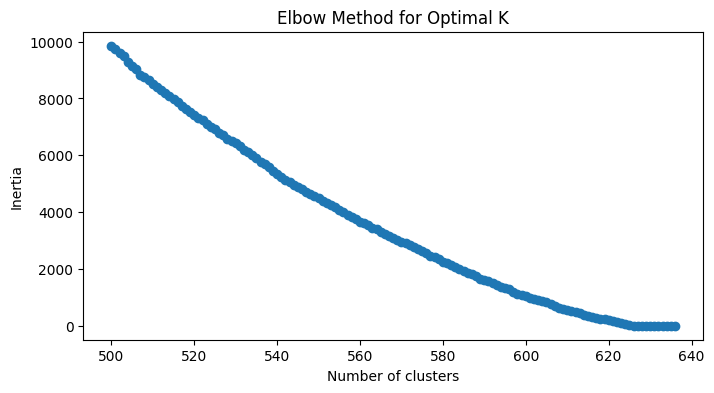

In [53]:
from sklearn.cluster import KMeans

# Range of clusters to try

k_range = range(500,637)

# Calculate inertia for each number of clusters

inertia = []
for k in k_range:
    kmeans = KMeans(k, random_state=42)
    kmeans.fit(customer_order_patterns)
    inertia.append(kmeans.inertia_)

# Plot the inertia against the number of clusters

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow Method is used to determine the optimal number of clusters for a given dataset. However, here, we observe that the number of clusters is too large and almost every data point is very different from other data point so forming clusters for users does not help us in providing recommendations.

# Implementation of Recomendation Algorithm's

In [54]:
warnings.filterwarnings("ignore")

In [55]:
#Importing library and dataset

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
all_except_last_orders = pd.read_csv('all_except_last_orders.csv')

# Split the dataset into training and testing sets
# We'll use 80% of the data for training and 20% for testing
train_data, test_data = train_test_split(all_except_last_orders, test_size=0.2, random_state=42)

# Save train and test sets
#train_data.to_csv('all_except_last_orders.csv', index=False)
#test_data.to_csv('test_data.csv', index=False)


In [56]:
import pandas as pd

# Load the datasets
all_except_last_orders = pd.read_csv('all_except_last_orders.csv')
last_orders_subset = pd.read_csv('last_orders_subset.csv')

# Identify unique members in last_orders_subset
unique_members_last_orders = last_orders_subset['Member'].unique()

# Filter all_except_last_orders to keep only rows with members in unique_members_last_orders
filtered_data = all_except_last_orders[all_except_last_orders['Member'].isin(unique_members_last_orders)]

# Save the filtered data to a new CSV file
#filtered_data.to_csv('filtered_all_except_last_orders.csv', index=False)

print("Filtered data has been saved to 'filtered_all_except_last_orders.csv'")
train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42)


Filtered data has been saved to 'filtered_all_except_last_orders.csv'


In [57]:
# Recomendations functions and matrix creation

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Create a user-item matrix for training data
user_item_matrix = train_data.pivot_table(index='Member', columns='SKU', aggfunc='size', fill_value=0)

# Compute the cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
# Compute the cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)

# Predict the top 5 SKUs for each user in the test set
def recommend_items_item_based(member_id, user_item_matrix, item_similarity, top_n=5):
    member_items = user_item_matrix.loc[member_id]
    member_items_idx = np.where(member_items > 0)[0]

    item_scores = item_similarity[member_items_idx].sum(axis=0)
    recommended_items_idx = np.argsort(-item_scores)[:top_n]

    recommended_items = user_item_matrix.columns[recommended_items_idx]
    return recommended_items.tolist()


# Predict the top 5 SKUs for each user in the test set
def recommend_items_user_based(member_id, user_similarity, user_item_matrix, top_n=5):
    user_idx = user_item_matrix.index.get_loc(member_id)
    similar_users = user_similarity[user_idx]
    similar_users_idx = np.argsort(-similar_users)[1:top_n+1]

    recommended_items = user_item_matrix.iloc[similar_users_idx].sum(axis=0).sort_values(ascending=False)
    return recommended_items.index[:top_n].tolist()

def recommend_items_hybrid(member_id, user_item_matrix, user_similarity, item_similarity, top_n=5):
    # User-based recommendations
    user_idx = user_item_matrix.index.get_loc(member_id)
    similar_users = user_similarity[user_idx]
    similar_users_idx = np.argsort(-similar_users)[1:top_n+1]
    user_based_scores = user_item_matrix.iloc[similar_users_idx].sum(axis=0)
    
    # Item-based recommendations
    member_items = user_item_matrix.loc[member_id]
    member_items_idx = np.where(member_items > 0)[0]
    item_based_scores = item_similarity[member_items_idx].sum(axis=0)
    
    # Debugging: Print shapes to identify the issue
    #print(f"Shapes: user_based_scores={user_based_scores.shape}, item_based_scores={item_based_scores.shape}")
    
    # Combine scores from both methods
    combined_scores = user_based_scores + item_based_scores
    
    # Get top n recommended items
    recommended_items_idx = np.argsort(-combined_scores)[:top_n]
    recommended_items = user_item_matrix.columns[recommended_items_idx]
    
    return recommended_items.tolist()


# Get recommendations for the test set
test_members = test_data['Member'].unique()
recommendations_user_based = {member: recommend_items_user_based(member , user_similarity,user_item_matrix) for member in test_members}

# Get recommendations for the test set
recommendations_item_based = {member: recommend_items_item_based(member, user_item_matrix, item_similarity) for member in test_members}


# Get recommendations for the test set
test_members = test_data['Member'].unique()
recommendations_hybrid_based = {member: recommend_items_hybrid(member, user_item_matrix, user_similarity, item_similarity) for member in test_members}


In [58]:
# Evaluating recomendation algo's for accuracy

from sklearn.metrics import precision_score, recall_score, f1_score



def evaluate_recommendations(true_data, recommendations):
    precisions = []
    recalls = []
    f1_scores = []

    for member in true_data['Member'].unique():
        true_items = true_data[true_data['Member'] == member]['SKU'].tolist()
        pred_items = recommendations.get(member, [])

        if not pred_items:  # If there are no predictions for this member, continue
            continue

        # Convert to sets to find the intersection
        true_set = set(true_items)
        pred_set = set(pred_items)

        intersection_len = len(true_set & pred_set)
        precision = intersection_len / len(pred_set) if pred_set else 0
        recall = intersection_len / len(true_set) if true_set else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    return np.mean(precisions), np.mean(recalls), np.mean(f1_scores)


# Evaluate user-based recommendations
precision_user, recall_user, f1_userbased = evaluate_recommendations(test_data, recommendations_user_based)
print(f"User-Based Collaborative Filtering - Precision: {precision_user}, Recall: {recall_user}, F1-Score: {f1_userbased}")

# Evaluate hybrid-based recommendations
precision_user, recall_user, f1_user = evaluate_recommendations(test_data, recommendations_hybrid_based)
print(f"Hybrid-Based Collaborative Filtering - Precision: {precision_user}, Recall: {recall_user}, F1-Score: {f1_user}")

# Evaluate item-based recommendations
precision_item, recall_item, f1_itembased = evaluate_recommendations(test_data, recommendations_item_based)
print(f"Item-Based Collaborative Filtering - Precision: {precision_item}, Recall: {recall_item}, F1-Score: {f1_itembased}")



User-Based Collaborative Filtering - Precision: 0.1818770226537217, Recall: 0.10327863748374802, F1-Score: 0.11747915088323753
Hybrid-Based Collaborative Filtering - Precision: 0.18834951456310683, Recall: 0.10646771046767076, F1-Score: 0.12133426391741507
Item-Based Collaborative Filtering - Precision: 0.1750809061488673, Recall: 0.0958925809457975, F1-Score: 0.11272838891201314


In [59]:
# Hybrid recommendation algo used
import pandas as pd

def recommend_items_hybrid(member_id, user_item_matrix, user_similarity, item_similarity, top_n=5):
    # User-based recommendations
    user_idx = user_item_matrix.index.get_loc(member_id)
    similar_users = user_similarity[user_idx]
    similar_users_idx = np.argsort(-similar_users)[1:top_n+1]
    user_based_scores = user_item_matrix.iloc[similar_users_idx].sum(axis=0)
    
    # Item-based recommendations
    member_items = user_item_matrix.loc[member_id]
    member_items_idx = np.where(member_items > 0)[0]
    item_based_scores = item_similarity[member_items_idx].sum(axis=0)
    
    # Combine scores from both methods
    combined_scores = user_based_scores + item_based_scores
    recommended_items_idx = np.argsort(-combined_scores)[:top_n]
    recommended_items = user_item_matrix.columns[recommended_items_idx]
    
    return recommended_items.tolist()
last_orders_subset = pd.read_csv('last_orders_subset.csv')


# Generate recommendations for the last orders
final_recommendations = {
    member: recommend_items_hybrid(member, user_item_matrix, user_similarity, item_similarity) 
    for member in last_orders_subset['Member'].unique()
}

# Create a list to store the recommendations
recommendations_list = []
nui=1
for member, skus in final_recommendations.items():
    order_id = last_orders_subset[last_orders_subset['Member'] == member]['Order'].iloc[0]
    for sku in skus:
        recommendations_list.append({'ID':nui , 'Order': order_id, 'SKU': sku, 'Member': member })
        nui+=1

# Convert the list to a DataFrame
recommendations_df = pd.DataFrame(recommendations_list)

# Save the recommendations to a CSV file
recommendations_df.to_csv('GR12_rec_5_sets2.csv', index=False)

print("Final recommendations have been saved to GR12_rec_5_sets2.csv.csv ")


Final recommendations have been saved to GR12_rec_5_sets2.csv.csv 


Conclusion:
- The developed recommendation system successfully provides personalized product recommendations to customers.
- The hybrid approach yielded the most accurate and relevant recommendations, combining the strengths of user-based and item-based methods.
- Final recommendations have been saved in `GR12_rec_5_sets.csv.csv`.


## Recomendation Algorithm 2

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.sparse.linalg import svds
import numpy as np

# Step 1: Load and preprocess data
all_past_orders = pd.read_csv('all_except_last_orders.csv')
last_orders_subset = pd.read_csv('last_orders_subset.csv')

# Display the first few rows and column names to understand the structure
print(all_past_orders.head())
print(last_orders_subset.head())

# Step 2: Encode SKU and Member columns
combined_data = pd.concat([all_past_orders, last_orders_subset])

sku_encoder = LabelEncoder()
member_encoder = LabelEncoder()

sku_encoder.fit(combined_data['SKU'])
member_encoder.fit(combined_data['Member'])

all_past_orders['SKU_encoded'] = sku_encoder.transform(all_past_orders['SKU'])
all_past_orders['Member_encoded'] = member_encoder.transform(all_past_orders['Member'])

last_orders_subset['SKU_encoded'] = sku_encoder.transform(last_orders_subset['SKU'])
last_orders_subset['Member_encoded'] = member_encoder.transform(last_orders_subset['Member'])

# Step 3: Handle duplicates by aggregating the number of orders
all_past_orders_agg = all_past_orders.groupby(['Member_encoded', 'SKU_encoded']).size().reset_index(name='Order_count')

# Create user-item matrix
user_item_matrix = all_past_orders_agg.pivot(index='Member_encoded', columns='SKU_encoded', values='Order_count').fillna(0)

# Step 4: Apply SVD
# Convert user-item matrix to numpy array
R = user_item_matrix.values

# Perform SVD
U, sigma, Vt = svds(R, k=95)
sigma = np.diag(sigma)

# Predict ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert the predicted ratings to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)

# Step 5: Generate recommendations for the last orders subset
recommendations = []

for order in last_orders_subset['Order'].unique():
    order_subset = last_orders_subset[last_orders_subset['Order'] == order]
    member = order_subset['Member'].iloc[0]
    member_encoded = member_encoder.transform([member])[0]

    member_ratings = predicted_ratings_df.loc[member_encoded].sort_values(ascending=False)
    member_items = order_subset['SKU_encoded'].values

    # Exclude already bought items
    member_items = [item for item in member_items if item in member_ratings.index]
    recommended_items = member_ratings.drop(index=member_items).head(5).index
    recommended_skus = sku_encoder.inverse_transform(recommended_items)

    recommendations.append((member, order, recommended_skus))

# Create a DataFrame for recommendations
recommendations_list = []
nui = 1
for member, order, skus in recommendations:
    for sku in skus:
        recommendations_list.append({'ID': nui, 'Order': order, 'SKU': sku, 'Member': member})
        nui += 1

recommendations_df = pd.DataFrame(recommendations_list)

# Save the recommendations to a CSV file
recommendations_df.to_csv('GR12_rec_5_sets.csv', index=False)

print("Final recommendations have been saved to GR12_rec_5_sets.csv")


     Order       SKU   Member Delivery Date             Name
0  8358896  15668375  SSCEHNS      02/11/13  Root Vegetables
1  8358896  15668467  SSCEHNS      02/11/13            Beans
2  8358896  15669863  SSCEHNS      02/11/13        Moong Dal
3  8358896  15669778  SSCEHNS      02/11/13       Other Dals
4  8358896  15669767  SSCEHNS      02/11/13         Urad Dal
     Order       SKU   Member Delivery Date            Name
0  7409204  15669778  SWLCNOE      05/09/13      Other Dals
1  8076206  15669977  SWOEZES      01/04/14         Almonds
2  7560723   7593949  SSWWRHW      30/06/13  Cream Biscuits
3  8362837  15669764  SWLSCOZ      06/11/13           Besan
4  8202458  15670196  SSRCRSO      03/02/14     Organic F&V
Final recommendations have been saved to GR12_rec_5_sets.csv


Based on testing on Kaggle, the recommendation algorithm using SVD demonstrated better accuracy compared to other methods.